This is a demonstration script for using the Contour class in the COAsT
package. This object has strict data formatting requirements, which are
outlined in contour.py.

The code is taken directly from unit_tesing/unit_test.py

In this tutorial we take a look the following Isobath Contour Methods:
    a. Extract isbath contour between two points
    b. Plot contour on map
    c. Calculate pressure along contour
    d. Calculate flow across contour
    e. Calculate pressure gradient driven flow across contour


Load packages and define some file paths.

In [1]:
import coast
import matplotlib.pyplot as plt

# Define some file paths
root = "../../"
dn_files = root + "./example_files/"

fn_nemo_dat_t = dn_files + "nemo_data_T_grid.nc"
fn_nemo_dat_u = dn_files + "nemo_data_U_grid.nc"
fn_nemo_dat_v = dn_files + "nemo_data_V_grid.nc"
fn_nemo_dom = dn_files + "coast_example_nemo_domain.nc"
# Configuration files describing the data files
fn_config_t_grid = root + "./config/example_nemo_grid_t.json"
fn_config_f_grid = root + "./config/example_nemo_grid_f.json"
fn_config_u_grid = root + "./config/example_nemo_grid_u.json"
fn_config_v_grid = root + "./config/example_nemo_grid_v.json"


### Extract isobath contour between two points and create contour object.


Create a gridded object with the grid only.

In [2]:
nemo_f = coast.Gridded(fn_domain=fn_nemo_dom, config=fn_config_f_grid)

Then create a contour object on the 200m isobath.

In [3]:
contours, no_contours = coast.Contour.get_contours(nemo_f, 200)

Extract the indices for the contour in a specified box.

In [4]:
y_ind, x_ind, contour = coast.Contour.get_contour_segment(nemo_f, contours[0], [50, -10], [60, 3])

Extract the contour for the specified indices.

In [5]:
cont_f = coast.ContourF(nemo_f, y_ind, x_ind, 200)

### Plot contour on map

<Figure size 640x480 with 0 Axes>

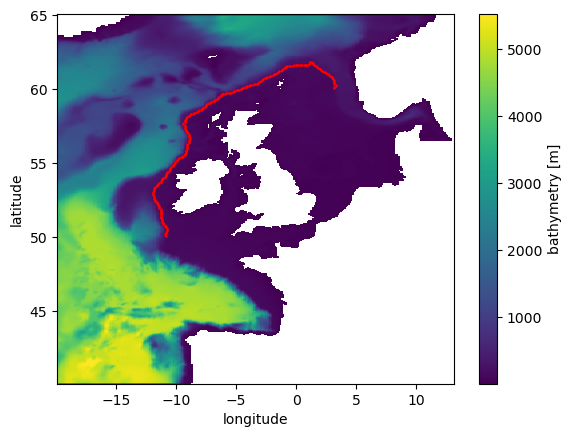

In [6]:
plt.figure()
coast.Contour.plot_contour(nemo_f, contour)
plt.show()


### Calculate pressure along contour.


Repeat the above procedure but on t-points.

In [7]:
nemo_t = coast.Gridded(fn_data=fn_nemo_dat_t, fn_domain=fn_nemo_dom, config=fn_config_t_grid)
contours, no_contours = coast.Contour.get_contours(nemo_t, 200)
y_ind, x_ind, contour = coast.Contour.get_contour_segment(nemo_t, contours[0], [50, -10], [60, 3])
cont_t = coast.ContourT(nemo_t, y_ind, x_ind, 200)

Now contruct pressure along this contour segment.

In [8]:
cont_t.construct_pressure(1027)

# This creates ``cont_t.data_contour.pressure_s`` and ``cont_t.data_contour.pressure_h_zlevels`` fields.


### Calculate flow across contour.

Create the contour segement on f-points again.

In [9]:
nemo_f = coast.Gridded(fn_domain=fn_nemo_dom, config=fn_config_f_grid)
nemo_u = coast.Gridded(fn_data=fn_nemo_dat_u, fn_domain=fn_nemo_dom, config=fn_config_u_grid)
nemo_v = coast.Gridded(fn_data=fn_nemo_dat_v, fn_domain=fn_nemo_dom, config=fn_config_v_grid)
contours, no_contours = coast.Contour.get_contours(nemo_f, 200)
y_ind, x_ind, contour = coast.Contour.get_contour_segment(nemo_f, contours[0], [50, -10], [60, 3])
cont_f = coast.ContourF(nemo_f, y_ind, x_ind, 200)

Calculate the flow across the contour, pass u- and v- gridded velocity objects.

In [10]:
cont_f.calc_cross_contour_flow(nemo_u, nemo_v)

# This creates fields ``cont_f.data_cross_flow.normal_velocities`` and
## ``cont_f.data_cross_flow.depth_integrated_normal_transport``


### Calculate pressure gradient driven flow across contour.
                                                                    

The "calc_geostrophic_flow()" operates on f-grid objects and requires configuration files for the u- and v- grids.

In [11]:
cont_f.calc_geostrophic_flow(nemo_t, config_u=fn_config_u_grid, config_v=fn_config_v_grid, ref_density=1027)

"""
 This constructs:
    cont_f.data_cross_flow.normal_velocity_hpg
    cont_f.data_cross_flow.normal_velocity_spg
    cont_f.data_cross_flow.transport_across_AB_hpg
    cont_f.data_cross_flow.transport_across_AB_spg
"""

'\n This constructs:\n    cont_f.data_cross_flow.normal_velocity_hpg\n    cont_f.data_cross_flow.normal_velocity_spg\n    cont_f.data_cross_flow.transport_across_AB_hpg\n    cont_f.data_cross_flow.transport_across_AB_spg\n'